In [4]:
pip install sentencepiece sacremoses

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 18.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

token = "your_hugging_face_token"

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased", token=token)
bert_model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased", token=token)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [15]:
# 从网络上加载 20 Newsgroups 数据集
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target

In [16]:
print(f"数据实例：{texts[0]}")
print(f"标签实例：{labels[0]}")

数据实例：

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


标签实例：10


In [27]:
import os

def load_20newsgroups_local(data_dir):
    texts = []
    labels = []
    label_names = []
    label_idx = 0

    for filename in os.listdir(data_dir):
        label_names.append(filename)

        file_path = os.path.join(data_dir, filename)

        # 遍历当前类别下的所有文件
        for the_file in os.listdir(file_path):
            file = os.path.join(file_path, the_file)
            with open(file, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read()
                texts.append(text)
                labels.append(label_idx)
        
        label_idx += 1

    return texts, labels, label_names

# 加载本地数据集
data_dir = "../data/20_newsgroups"  # 替换为你的本地数据集路径
texts, labels, label_names = load_20newsgroups_local(data_dir)

# 打印数据集信息
print(f"Total texts: {len(texts)}")
print(f"Total labels: {len(labels)}")
print(f"Label names: {label_names}")

Total texts: 19997
Total labels: 19997
Label names: ['comp.graphics', 'rec.sport.baseball', 'talk.politics.mideast', 'sci.med', 'rec.sport.hockey', 'misc.forsale', 'alt.atheism', 'comp.os.ms-windows.misc', 'sci.crypt', 'comp.windows.x', 'talk.religion.misc', 'comp.sys.mac.hardware', 'talk.politics.guns', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'rec.motorcycles', 'talk.politics.misc', 'soc.religion.christian', 'sci.space', 'rec.autos']


In [22]:
idx = 1000
print(f"数据实例：{texts[idx]}")
print(f"标签实例：{labels[idx]}")

数据实例：Newsgroups: rec.sport.baseball
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!ux1.cso.uiuc.edu!news.cso.uiuc.edu!uxa.cso.uiuc.edu!cka52397
From: cka52397@uxa.cso.uiuc.edu (OrioleFan@uiuc)
Subject: Re: And America's Team is....But Why?
Date: Sun, 18 Apr 1993 20:08:51 GMT
Message-ID: <C5p3yr.GH2@news.cso.uiuc.edu>
References: <kingoz.735066879@camelot>
Sender: usenet@news.cso.uiuc.edu (Net Noise owner)
Organization: University of Illinois at Urbana
Lines: 43

kingoz@camelot.bradley.edu (Orin Roth) writes:

>   Well, officially it's the Braves. At least up until they started winning
>   it was. Are they still, officially? 
>   If so, why? and how did they receive this label?
>   
>   Unoffically, but without a doubt, America's Team is the Cubs. Why?
>   Well, my guess is because America loves underdogs. Every year, no matter
>   the Cubs' talent or the predictions, they never (as close to never as
>   possible) win anything. Over the years, a

In [26]:
# # 将标签编码为整数
# label_encoder = LabelEncoder()
# labels = label_encoder.fit_transform(labels)
# print(f"标签示例：{labels[0]}")

标签示例：0


In [30]:
# 划分训练集和测试集
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
# 打印样本
print(f"训练集大小: {len(train_texts)}")
print(f"测试集大小: {len(test_texts)}")
print(f"示例文本: {train_texts[0]}")
print(f"示例标签: {train_labels[0]}")

训练集大小: 15997
测试集大小: 4000
示例文本: Newsgroups: ny.forsale,misc.forsale
Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!darwin.sura.net!haven.umd.edu!uunet!psinntp!cook!sarah!albnyvms.bitnet!RT6465
From: rt6465@albnyvms.bitnet
Subject: snowboard
Message-ID: <1993Apr26.053258.27466@sarah.albany.edu>
Sender: news@sarah.albany.edu (News Administrator)
Reply-To: rt6465@albnyvms.bitnet
Organization: University of Albany, SUNY
Date: Mon, 26 Apr 93 05:32:58 GMT
Lines: 10

1988 Burton Air Snowboard

Multiflex bindings
triple strap on back binding
board bag and leash included
recently toned and waxed 

$139 firm.

rt6465@albnyvms.bitnet

示例标签: 5


In [31]:
# 定义数据集
class NewsgroupsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [34]:
# 创建数据集和数据加载器
train_dataset = NewsgroupsDataset(train_texts, train_labels, tokenizer)
test_dataset = NewsgroupsDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 检查一个批次的数据
for batch in train_loader:
    print("输入数据形状:", batch['input_ids'].shape)
    print("输入数据:", batch['input_ids'][0])
    print("数据掩码形状:", batch['attention_mask'].shape)
    print("数据掩码:", batch['attention_mask'][0])
    print("标签数据形状:", batch['label'].shape)
    print("标签数据:", batch['label'][0])
    break

编号形状: torch.Size([16, 128])
编号数据: tensor([  101,  2739, 17058,  2015,  1024,  4012,  2361,  1012,  3645,  1012,
         1060,  4130,  1024,  2064,  9080,  7140,  5051,  1012,  5034,  2615,
         1012, 20116,  1012,  4642,  2226,  1012,  3968,  2226,   999, 10541,
          999, 20904,  2884,   999,  8814, 19894,   999, 20116,  1012, 21183,
        10288,  3022,  1012,  3968,  2226,   999,  1057,  2860,  2213,  1012,
         3968,  2226,   999,  6187,  2368,   999, 23068, 26526,  4502,   999,
        19954,   999, 20517,   999,  3505,  2013,  1024,  3505,  1030, 20517,
         1012,  3448,  1012,  3968,  2226,  1006,  2745, 11526,  1007,  3395,
         1024,  2128,  1024,  2559,  2005,  1037,  5371, 24805,  4590,  2104,
         1060, 14526,  2099,  2629,  4471,  1011,  8909,  1024,  1026,  1039,
         2629,  2100,  2480,  2549,  2497,  1012,  1023,  3501,  2629,  1030,
        19954,  1012, 16222,  1012,  3448,  1012,  3968,  2226,  1028,  4604,
         2121,  1024,  2224,  

In [56]:
# 定义分类模型，在bert模型后面加上分类头
class BertClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        # self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        self.fc = nn.Linear(self.bert.config.vocab_size, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.logits[:, 0, :]  # 使用 [CLS] 向量
        pooled_output = self.dropout(pooled_output)
        return self.fc2(self.fc(pooled_output))

In [57]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 初始化模型
num_classes = len(label_names)
model = BertClassifier(bert_model, num_classes)

# 定义优化器和损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
scheduler = ReduceLROnPlateau(optimizer, mode="max", factor=0.1, patience=2)

loss_fn = nn.CrossEntropyLoss()

In [48]:
# 验证
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def evaluate(model, val_loader, device):
    model.eval()
    model.to(device)

    predictions = []
    true_labels = []

    with torch.no_grad():
        test_bar = tqdm(val_loader, desc="验证")
        for batch in test_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids, attention_mask)

            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(predictions, true_labels)
    return accuracy

In [58]:
# 训练
def train(model, train_loader, val_loader, optimizer, scheduler, loss_fn, device, epochs=5):
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({"loss": loss.item()})

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1} 平均损失: {avg_loss:.4f}")

        # 验证集上评估
        val_accuracy = evaluate(model, val_loader, device)
        print(f"验证集准确率: {val_accuracy:.4f}")

        # 动态调整学习率
        scheduler.step(val_accuracy)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train(model, train_loader, train_loader, optimizer, scheduler, loss_fn, device, epochs=5)

Epoch 1/5: 100%|██████████| 1000/1000 [01:39<00:00, 10.04it/s, loss=0.244]  


Epoch 1 平均损失: 0.6294


验证: 100%|██████████| 1000/1000 [00:50<00:00, 19.63it/s]


验证集准确率: 0.8817


Epoch 2/5: 100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s, loss=0.414]  


Epoch 2 平均损失: 0.3803


验证: 100%|██████████| 1000/1000 [00:51<00:00, 19.30it/s]


验证集准确率: 0.8891


Epoch 3/5: 100%|██████████| 1000/1000 [01:39<00:00, 10.07it/s, loss=0.47]   


Epoch 3 平均损失: 0.3168


验证: 100%|██████████| 1000/1000 [00:52<00:00, 19.19it/s]


验证集准确率: 0.9225


Epoch 4/5: 100%|██████████| 1000/1000 [01:40<00:00,  9.96it/s, loss=0.00277]


Epoch 4 平均损失: 0.2648


验证: 100%|██████████| 1000/1000 [00:53<00:00, 18.73it/s]


验证集准确率: 0.9357


Epoch 5/5: 100%|██████████| 1000/1000 [01:41<00:00,  9.87it/s, loss=0.661]  


Epoch 5 平均损失: 0.2137


验证: 100%|██████████| 1000/1000 [00:53<00:00, 18.59it/s]

验证集准确率: 0.9509


In [59]:
test_accuracy = evaluate(model, test_loader, device)
print(f"验证集准确率: {test_accuracy:.4f}")

验证: 100%|██████████| 250/250 [00:14<00:00, 17.50it/s]

验证集准确率: 0.9055


In [60]:
torch.save(model.state_dict(), 'bert_muticlassifier_model.pth')

In [61]:
# 初始化模型
num_classes = len(label_names)
model = BertClassifier(bert_model, num_classes)

model.load_state_dict(torch.load('bert_muticlassifier_model.pth'))

<All keys matched successfully>

In [62]:
def preprocess_text(text, tokenizer, max_length=128):
    """
    将文本转换为模型输入格式。
    """
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',  # 返回 PyTorch 张量
    )
    return encoding['input_ids'], encoding['attention_mask']

In [63]:
def predict_onetext(text, model, tokenizer, device='cpu'):
    """
    对单个文本进行预测。
    """
    # 将模型设置为评估模式
    model.eval()
    model.to(device)

    # 预处理文本
    input_ids, attention_mask = preprocess_text(text, tokenizer)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    # 模型推理
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs  # 假设模型输出是 logits
        probs = torch.softmax(logits, dim=-1)  # 将 logits 转换为概率
        pred_label = torch.argmax(probs, dim=-1).item()  # 获取预测标签

    return pred_label, probs

In [65]:
idx = 1000
text = test_texts[idx]
label = test_labels[idx]

# 进行预测
pred_label, probs = predict_onetext(text, model, tokenizer, device)

# 输出结果
print(f"True label: {label}")
print(f"Predicted label: {pred_label}")
print(f"Probabilities: {probs}")

True label: 13
Predicted label: 13
Probabilities: tensor([[2.0200e-11, 2.7324e-13, 2.2330e-13, 8.6832e-12, 8.6169e-16, 9.0651e-10,
         9.9373e-17, 1.2146e-11, 1.2429e-14, 4.8314e-12, 9.1625e-17, 1.3174e-13,
         1.5674e-15, 1.0000e+00, 9.5291e-13, 1.4100e-12, 1.0034e-15, 4.8164e-15,
         7.4658e-15, 7.7980e-13]], device='cuda:0')


In [66]:
# 测试集上预测
def predict(model, test_loader, device):
    model.eval()
    model.to(device)

    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="测试集预测"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# 在测试集上进行预测
test_predictions, test_true_labels = predict(model, test_loader, device)

测试集预测: 100%|██████████| 250/250 [00:14<00:00, 17.64it/s]


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_predictions, test_true_labels)
precision = precision_score(test_predictions, test_true_labels, average="weighted")
recall = recall_score(test_predictions, test_true_labels, average="weighted")
f1 = f1_score(test_true_labels, test_predictions, average='weighted')

print(f"测试集准确率: {accuracy:.4f}")
print(f"测试集精确率: {precision:.4f}")
print(f"测试集召回率: {recall:.4f}")
print(f"测试集 F1 分数: {f1:.4f}")

测试集准确率: 0.9055
测试集精确率: 0.9142
测试集召回率: 0.9055
测试集 F1 分数: 0.9052


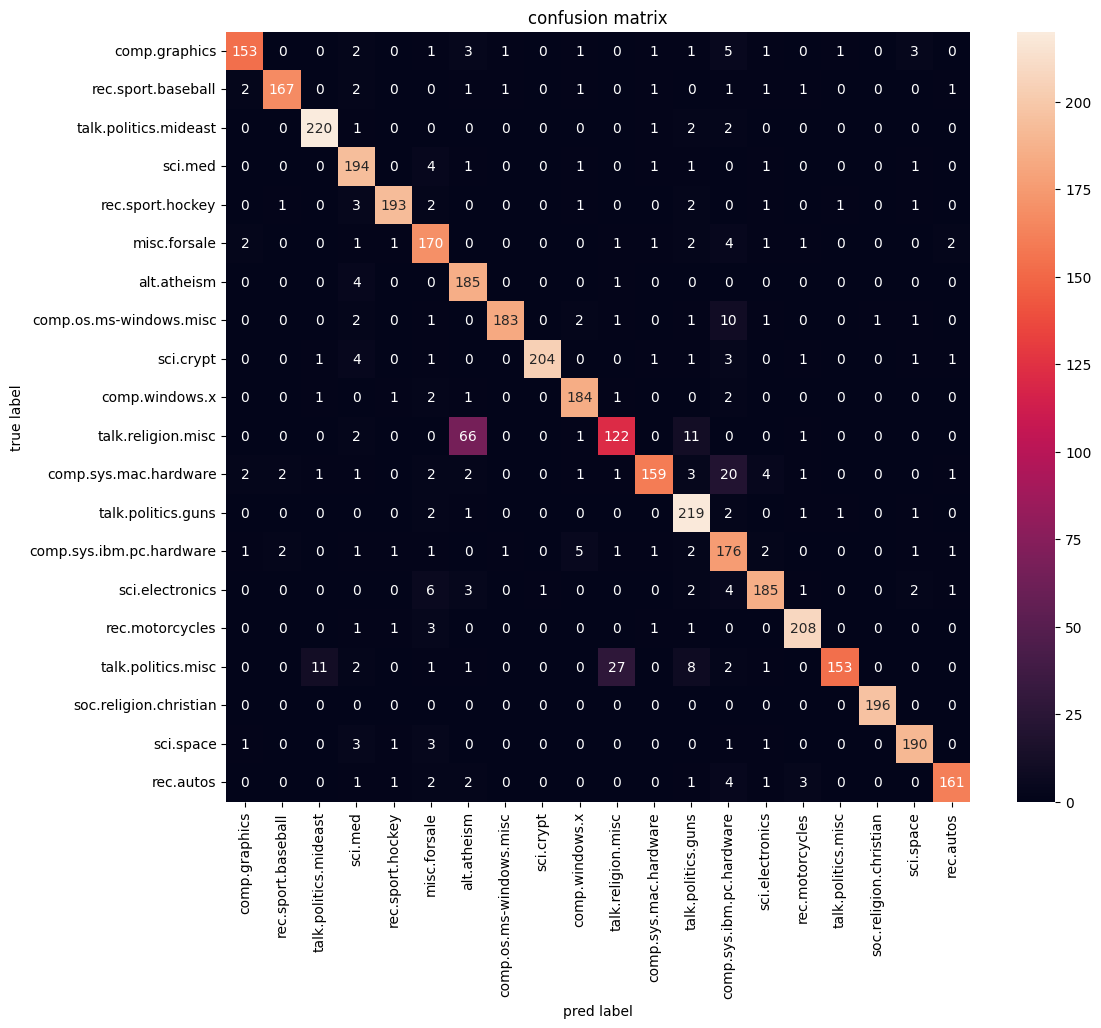

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(test_true_labels, test_predictions)

# 绘制混淆矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('pred label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()